In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy import stats

In [2]:
df = pd.read_csv("BankChurners.csv")

## Data Preparation and Descriptive Statistics

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28


In [4]:
df.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000


In [7]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

In [8]:
df[["Gender", "Education_Level", "Attrition_Flag", "Marital_Status", "Income_Category", "Card_Category"]] =\
df[["Gender", "Education_Level", "Attrition_Flag", "Marital_Status", "Income_Category", "Card_Category"]].astype('category')


In [9]:
df.groupby(["Gender", "Education_Level"])['Credit_Limit'].agg(['mean', 'std', 'median'])

mean           std  median
Gender Education_Level                                    
F      College           4775.495301   4901.154161  3073.5
       Doctorate         5378.623735   6119.726594  3128.0
       Graduate          5011.336766   5099.887459  3111.0
       High School       5132.125584   5293.171477  3134.0
       Post-Graduate     4719.267681   4904.089766  2968.0
       Uneducated        5150.244724   5370.449249  2996.5
       Unknown           4937.711453   5426.510141  2912.5
M      College          13008.049064  10973.435269  8854.0
       Doctorate        12433.368557  10517.329330  8886.0
       Graduate         12637.744376  10684.420065  8707.0
       High School      12231.165178  10474.024808  8285.0
       Post-Graduate    13169.619763  10776.157621  9815.0
       Uneducated       13218.487844  10736.897705  9474.0
       Unknown          12573.721216  10499.105766  9026.0

In [10]:
df.groupby(["Gender", "Card_Category"])["CLIENTNUM"].count()

Gender  Card_Category
F       Blue             5101
        Gold               38
        Platinum            9
        Silver            210
M       Blue             4335
        Gold               78
        Platinum           11
        Silver            345
Name: CLIENTNUM, dtype: int64

In [11]:
df.groupby(["Gender", "Education_Level"]).CLIENTNUM.count()

Gender  Education_Level
F       College             532
        Doctorate           257
        Graduate           1670
        High School        1028
        Post-Graduate       263
        Uneducated          796
        Unknown             812
M       College             481
        Doctorate           194
        Graduate           1458
        High School         985
        Post-Graduate       253
        Uneducated          691
        Unknown             707
Name: CLIENTNUM, dtype: int64

In [12]:
df.groupby(["Gender", "Income_Category"]).CLIENTNUM.count()

Gender  Income_Category
F       $120K +               0
        $40K - $60K        1014
        $60K - $80K           0
        $80K - $120K          0
        Less than $40K     3284
        Unknown            1060
M       $120K +             727
        $40K - $60K         776
        $60K - $80K        1402
        $80K - $120K       1535
        Less than $40K      277
        Unknown              52
Name: CLIENTNUM, dtype: int64

In [13]:
df.groupby(["Marital_Status", "Income_Category"]).CLIENTNUM.agg("count")

Marital_Status  Income_Category
Divorced        $120K +              52
                $40K - $60K         138
                $60K - $80K         108
                $80K - $120K        103
                Less than $40K      254
                Unknown              93
Married         $120K +             354
                $40K - $60K         816
                $60K - $80K         661
                $80K - $120K        735
                Less than $40K     1628
                Unknown             493
Single          $120K +             274
                $40K - $60K         704
                $60K - $80K         531
                $80K - $120K        561
                Less than $40K     1429
                Unknown             444
Unknown         $120K +              47
                $40K - $60K         132
                $60K - $80K         102
                $80K - $120K        136
                Less than $40K      250
                Unknown              82
Name: CL

In [14]:
pearsonr(df["Customer_Age"], df["Credit_Limit"])[0]

0.00247622735966524

In [15]:
df['Income_Category'] = df['Income_Category'].cat.reorder_categories(['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +', 'Unknown'])

 The correlation coefficient between the cusstomer's age and the credit limit is 0.0024 which indicates very weak correlation.

## Visualization

<ipython-input-16-052d2390f851>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(levels, balance, alpha = .7, color = "rgbmk")


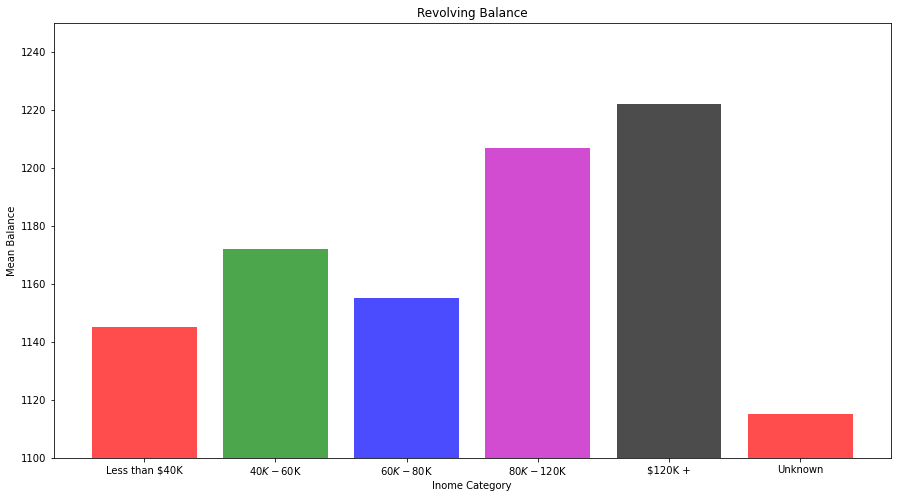

In [16]:
levels = ['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +', 'Unknown']
balance = df.groupby(["Income_Category"]).Total_Revolving_Bal.agg("mean")
plt.figure(figsize = (15, 8))
plt.ylim((1100,1250))
plt.bar(levels, balance, alpha = .7, color = "rgbmk")
plt.title("Revolving Balance")
plt.xlabel("Inome Category")
plt.ylabel("Mean Balance");

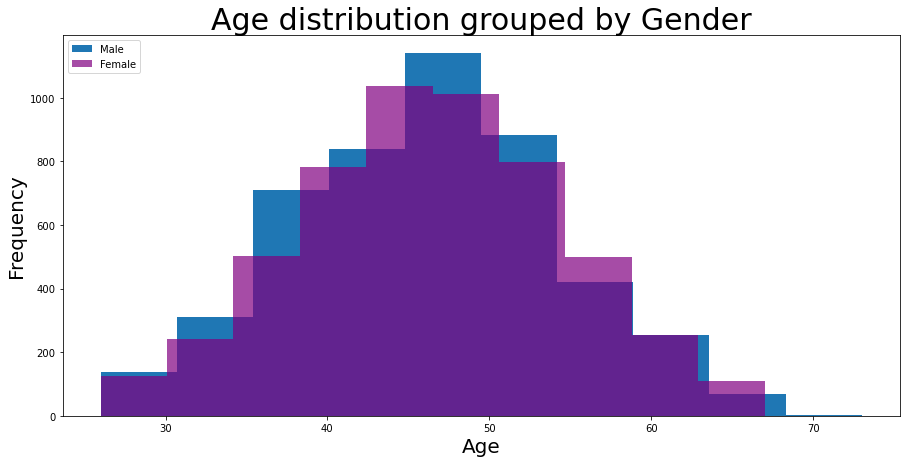

In [17]:
plt.figure(figsize = (15,7))
plt.hist(df[df["Gender"] == "M"].Customer_Age, label = "Male")
plt.hist(df[df["Gender"] == "F"].Customer_Age, alpha = 0.7, label = "Female", color = "purple")
plt.legend(loc = "upper left")
plt.title("Age distribution grouped by Gender", size = 30)
plt.xlabel("Age", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show();

C:\Users\maria\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:345: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


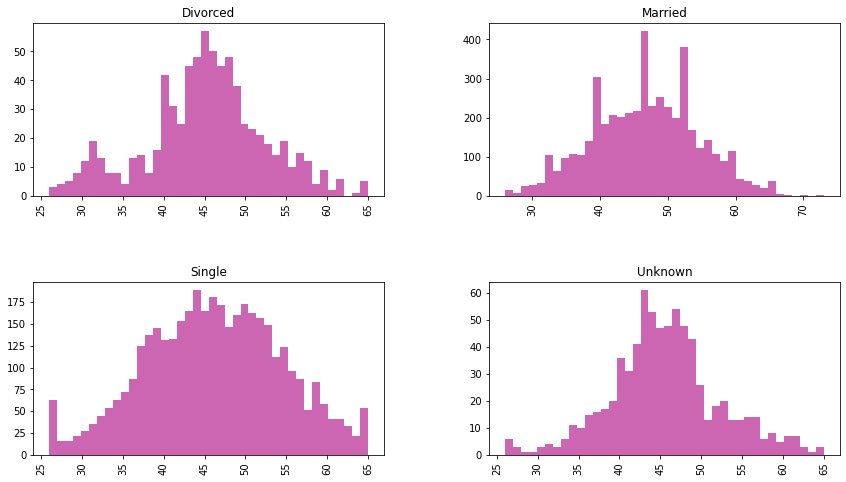

In [18]:
fig = plt.figure(figsize = (14, 8))
ax = fig.gca()
df['Customer_Age'].hist(by = df['Marital_Status'], ax = ax, bins = 40, color = (0.8,0.4,0.7));

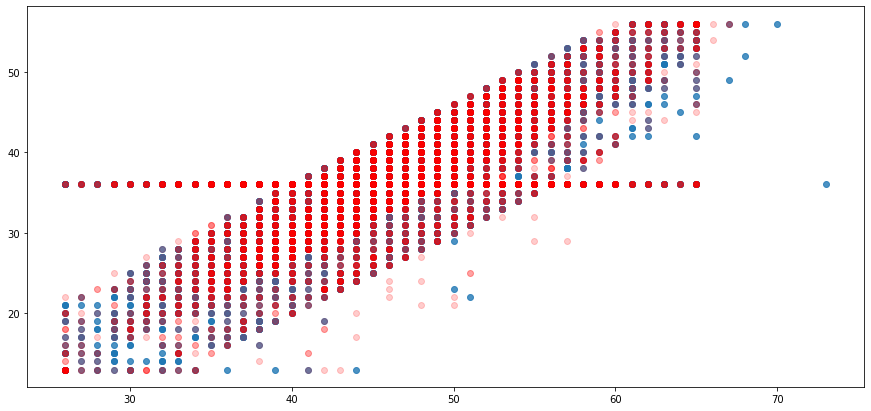

In [19]:
plt.figure(figsize = (15,7))
plt.scatter(df[df["Gender"] == "M"].Customer_Age, df[df["Gender"] == "M"].Months_on_book, label = "Male", alpha = 0.8)
plt.scatter(df[df["Gender"] == "F"].Customer_Age, df[df["Gender"] == "F"].Months_on_book, label = "Female", alpha = 0.2,\
           color = "red");

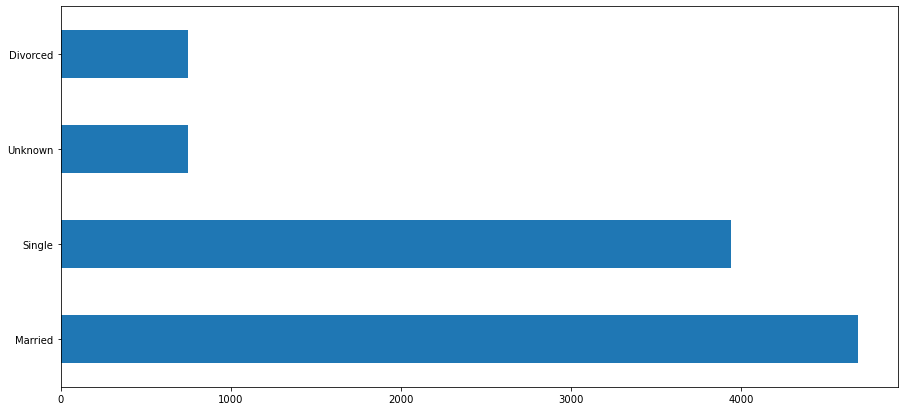

In [20]:
plt.figure(figsize = (15,7))
df["Marital_Status"].value_counts().plot.barh();

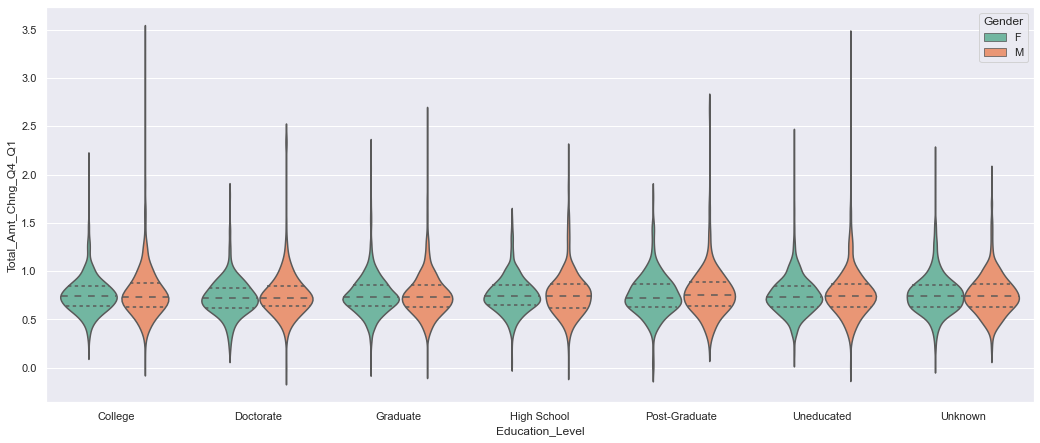

In [24]:
sns.set(rc={'figure.figsize':(17.7, 7.27)})
ax = sns.violinplot(x = "Education_Level", y = "Total_Amt_Chng_Q4_Q1", hue = "Gender", data = df,
                    palette="Set2", inner="quartile")

Hypothesis testing to decide if the mean number of transactions for the male and female customers are statistically significantly different. First, we do the ttest and then Kolmogorov-Smirnov test.

In [22]:
ttest, pval = stats.ttest_ind(df[df['Gender'] == "M"]["Total_Trans_Amt"], df[df['Gender'] == "F"]["Total_Trans_Amt"])
if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

we accept null hypothesis


In [23]:
kstest, pval = stats.kstest(df[df['Gender'] == "M"]["Total_Trans_Amt"],  df[df['Gender'] == "F"]["Total_Trans_Amt"])
if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

we accept null hypothesis
